<a href="https://colab.research.google.com/github/Hilda531/Orbit_Project/blob/main/Tugas%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library yg dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#tambahkan library sesuai kebutuhan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Studi/activity_km_07_01.csv')

In [4]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [5]:
#isi code
data = data.rename(columns = {'intensitas air':'intensitas_air', 'tinggi air':'tinggi_air'})
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              600 non-null    float64
 1   cahaya          590 non-null    object 
 2   intensitas_air  616 non-null    object 
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi_air      616 non-null    int64  
 6   aksi            616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.8+ KB


In [7]:
#Isi Code
data.isna().sum()

PH                16
cahaya            26
intensitas_air     0
suhu              27
PPM                5
tinggi_air         0
aksi               0
dtype: int64

In [8]:
data2 = data.dropna(subset=['cahaya'])
data2

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
10,NaN,Ada,Tinggi,26.5,NaN,219,Hidupkan Lampu
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [9]:
data2['aksi'].value_counts()

Tidak melakukan apa-apa                 451
Hidupkan Lampu                           88
Hidupkan Lampu dan Pompa nutrisi TDS     39
Hidupkan Pompa nutrisi TDS               12
Name: aksi, dtype: int64

In [10]:
data2.isna().sum()

PH                13
cahaya             0
intensitas_air     0
suhu              27
PPM                1
tinggi_air         0
aksi               0
dtype: int64

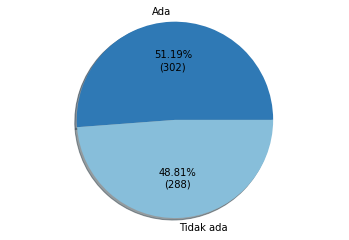

In [11]:
labels = data2['cahaya'].astype('category').cat.categories.tolist()
counts = data2['cahaya'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
palette = sns.color_palette("RdBu_r")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p : '{:.2f}%\n({:,.0f})'.format(p,p * sum(sizes)/100), shadow=True, colors=palette) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

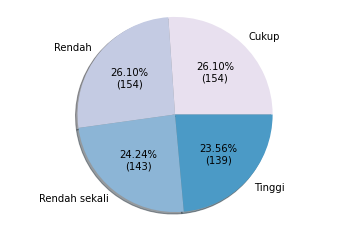

In [12]:
labels_ia2 = data2['intensitas_air'].astype('category').cat.categories.tolist()
counts_ia2 = data2['intensitas_air'].value_counts()
sizes_ia2 = [counts_ia2[var_cat2] for var_cat2 in labels_ia2]
palette2 = sns.color_palette("PuBuGn")
fig2, ax2 = plt.subplots()
ax2.pie(sizes_ia2, labels=labels_ia2, autopct=lambda p : '{:.2f}%\n({:,.0f})'.format(p,p * sum(sizes)/100), shadow=True, colors=palette2) #autopct is show the % on plot
ax2.axis('equal')
plt.show()

In [13]:
encode = {'cahaya': {"Ada": 5. , "Tidak ada": 6.},
          'intensitas_air': {"Rendah sekali": 1., "Rendah": 2., "Cukup": 3., "Tinggi": 4.}}

data2_encode = data2.replace(encode)

In [14]:
data2_encode['tinggi_air'] = data2_encode['tinggi_air'].astype('float')
data2_encode

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,5.0,4.0,27.0,188.0,622.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,5.0,4.0,26.9,79.0,557.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,5.0,4.0,27.0,11.0,491.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,5.0,4.0,27.1,345.0,12000.0,Tidak melakukan apa-apa
10,NaN,5.0,4.0,26.5,NaN,219.0,Hidupkan Lampu
...,...,...,...,...,...,...,...
611,4.6,5.0,1.0,25.3,904.0,47.0,Hidupkan Lampu
612,2.1,5.0,1.0,25.0,388.0,18.0,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,5.0,1.0,25.3,793.0,19.0,Hidupkan Lampu
614,1.4,5.0,1.0,25.4,1052.0,3.0,Hidupkan Lampu


## 3. Handle Missing Value

In [15]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': data.isna().sum(), 'perc_missing': (data.isna().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


In [16]:
#Isi Code
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan ,strategy = 'median')


# Fit imputer kedalam data X untuk kolom Age (index ke-1) dan Salary (index ke-2).
imputer = imputer.fit(data2_encode[['PH','suhu','PPM']])

#Replace missing value dengan mean pada kolom tersebut
data2_encode[['PH','suhu','PPM']] = imputer.transform(data2_encode[['PH','suhu','PPM']])


In [17]:
data2_encode

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,5.0,4.0,27.0,188.0,622.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,5.0,4.0,26.9,79.0,557.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,5.0,4.0,27.0,11.0,491.0,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,5.0,4.0,27.1,345.0,12000.0,Tidak melakukan apa-apa
10,6.5,5.0,4.0,26.5,994.0,219.0,Hidupkan Lampu
...,...,...,...,...,...,...,...
611,4.6,5.0,1.0,25.3,904.0,47.0,Hidupkan Lampu
612,2.1,5.0,1.0,25.0,388.0,18.0,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,5.0,1.0,25.3,793.0,19.0,Hidupkan Lampu
614,1.4,5.0,1.0,25.4,1052.0,3.0,Hidupkan Lampu


In [18]:
data2_encode.isna().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

In [19]:
data2_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              590 non-null    float64
 1   cahaya          590 non-null    float64
 2   intensitas_air  590 non-null    float64
 3   suhu            590 non-null    float64
 4   PPM             590 non-null    float64
 5   tinggi_air      590 non-null    float64
 6   aksi            590 non-null    object 
dtypes: float64(6), object(1)
memory usage: 36.9+ KB


## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [20]:
data2_encode.describe()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,6.636610,5.488136,2.489831,29.324746,1037.313559,288.252542
std,2.976293,0.500283,1.099034,14.910422,631.358165,634.984586
min,0.000000,5.000000,1.000000,-300.000000,1.000000,0.000000
25%,5.600000,5.000000,2.000000,27.100000,497.750000,50.000000
50%,6.500000,5.000000,2.000000,29.900000,994.000000,226.500000
75%,7.500000,6.000000,3.000000,33.000000,1603.750000,430.500000
max,14.000000,6.000000,4.000000,40.600000,2149.000000,12000.000000


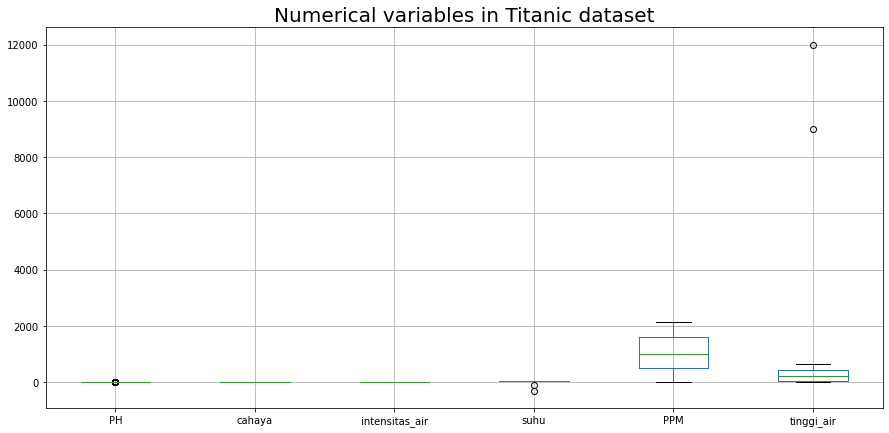

In [21]:
#Isi Code

num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air']
plt.figure(figsize=(15,7))
data2_encode[num_cols].boxplot()
plt.title("Numerical variables in Titanic dataset", fontsize=20)
plt.show()

In [22]:
import numpy as np
outliers = []
TA = np.asarray(data2[['tinggi_air']], dtype='float64')
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(TA)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [array([12000.]), array([9000.])]


In [23]:
data2_encode.iloc[:,:6]

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air
0,6.5,5.0,4.0,27.0,188.0,622.0
1,5.7,5.0,4.0,26.9,79.0,557.0
2,6.0,5.0,4.0,27.0,11.0,491.0
3,6.5,5.0,4.0,27.1,345.0,12000.0
10,6.5,5.0,4.0,26.5,994.0,219.0
...,...,...,...,...,...,...
611,4.6,5.0,1.0,25.3,904.0,47.0
612,2.1,5.0,1.0,25.0,388.0,18.0
613,3.2,5.0,1.0,25.3,793.0,19.0
614,1.4,5.0,1.0,25.4,1052.0,3.0


In [24]:
from scipy import stats

z_scores = stats.zscore(data2_encode.iloc[:,:6])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data2_encode = data2_encode[filtered_entries]

data2_encode

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,5.0,4.0,27.0,188.0,622.0,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,5.0,4.0,26.9,79.0,557.0,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,5.0,4.0,27.0,11.0,491.0,Hidupkan Lampu dan Pompa nutrisi TDS
10,6.5,5.0,4.0,26.5,994.0,219.0,Hidupkan Lampu
11,6.5,5.0,4.0,29.9,1604.0,103.0,Hidupkan Lampu
...,...,...,...,...,...,...,...
611,4.6,5.0,1.0,25.3,904.0,47.0,Hidupkan Lampu
612,2.1,5.0,1.0,25.0,388.0,18.0,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,5.0,1.0,25.3,793.0,19.0,Hidupkan Lampu
614,1.4,5.0,1.0,25.4,1052.0,3.0,Hidupkan Lampu


In [25]:
data2_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              586 non-null    float64
 1   cahaya          586 non-null    float64
 2   intensitas_air  586 non-null    float64
 3   suhu            586 non-null    float64
 4   PPM             586 non-null    float64
 5   tinggi_air      586 non-null    float64
 6   aksi            586 non-null    object 
dtypes: float64(6), object(1)
memory usage: 36.6+ KB


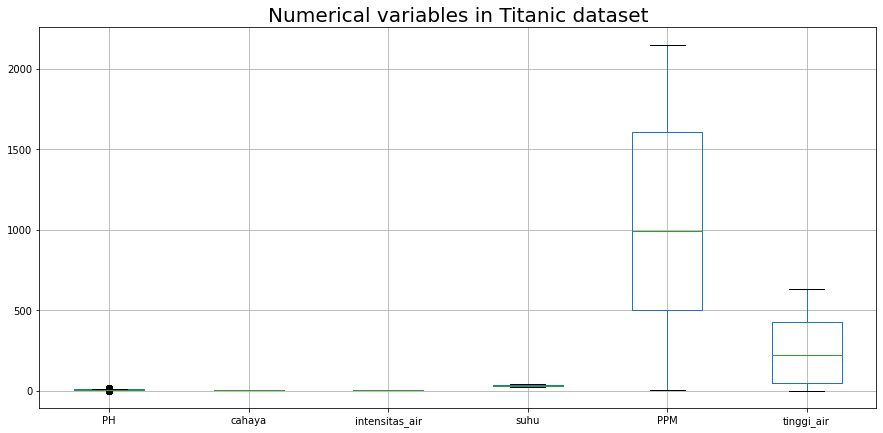

In [26]:
num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air']
plt.figure(figsize=(15,7))
data2_encode[num_cols].boxplot()
plt.title("Numerical variables in Titanic dataset", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [27]:
#Isi Code
# Data Feature
X = data2_encode.iloc[:, :-1]
X

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air
0,6.5,5.0,4.0,27.0,188.0,622.0
1,5.7,5.0,4.0,26.9,79.0,557.0
2,6.0,5.0,4.0,27.0,11.0,491.0
10,6.5,5.0,4.0,26.5,994.0,219.0
11,6.5,5.0,4.0,29.9,1604.0,103.0
...,...,...,...,...,...,...
611,4.6,5.0,1.0,25.3,904.0,47.0
612,2.1,5.0,1.0,25.0,388.0,18.0
613,3.2,5.0,1.0,25.3,793.0,19.0
614,1.4,5.0,1.0,25.4,1052.0,3.0


In [28]:
# Label
Y = data2_encode.iloc[:, -1]
Y

0      Hidupkan Lampu dan Pompa nutrisi TDS
1      Hidupkan Lampu dan Pompa nutrisi TDS
2      Hidupkan Lampu dan Pompa nutrisi TDS
10                           Hidupkan Lampu
11                           Hidupkan Lampu
                       ...                 
611                          Hidupkan Lampu
612    Hidupkan Lampu dan Pompa nutrisi TDS
613                          Hidupkan Lampu
614                          Hidupkan Lampu
615                          Hidupkan Lampu
Name: aksi, Length: 586, dtype: object

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [29]:
from collections import Counter

df = Counter(Y)
df = pd.DataFrame.from_dict(df, orient='index')
df.columns = ['Count']
df.sort_index()

,Count
Hidupkan Lampu,88
Hidupkan Lampu dan Pompa nutrisi TDS,39
Hidupkan Pompa nutrisi TDS,12
Tidak melakukan apa-apa,447


In [30]:
# !pip install imbalanced-learn

In [59]:
#Isi Code
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

over_sampler = SMOTE(k_neighbors=7)
X_res, Y_res = over_sampler.fit_resample(X, Y)
df_res = Counter(Y_res)
df_res = pd.DataFrame.from_dict(df_res, orient='index')
df_res.columns = ['Count']
df_res.sort_index()

,Count
Hidupkan Lampu,447
Hidupkan Lampu dan Pompa nutrisi TDS,447
Hidupkan Pompa nutrisi TDS,447
Tidak melakukan apa-apa,447


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

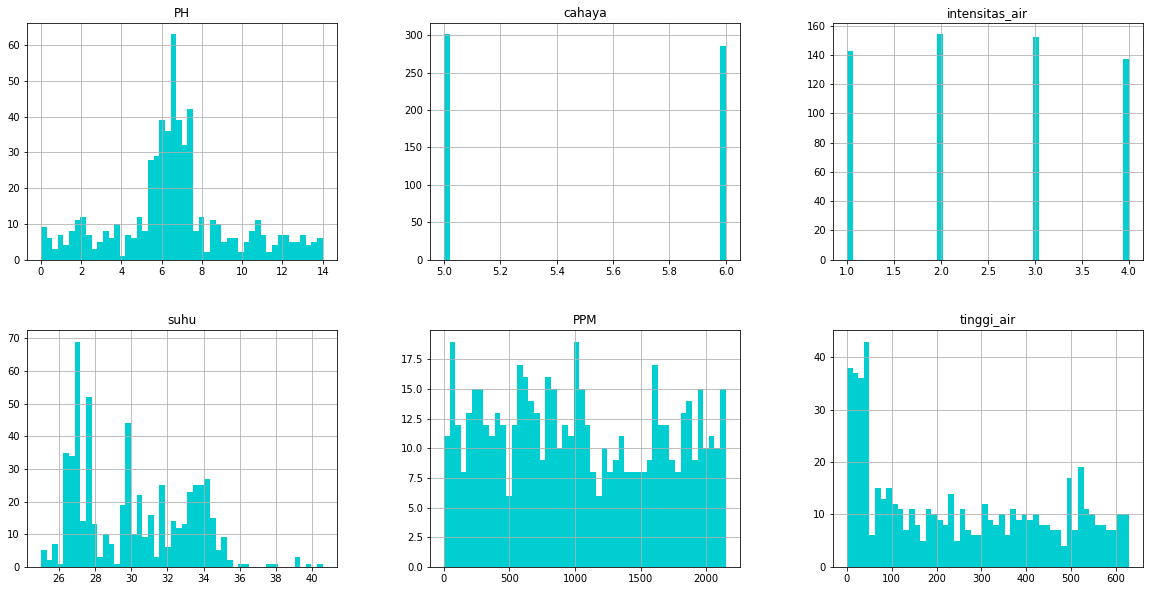

In [32]:
#Isi Code
hist = data2_encode.hist(figsize=(20,10), layout=(2,3), bins=50, color="darkturquoise")

In [33]:
data2_encode.describe()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,6.639932,5.486348,2.482935,30.112628,1035.460751,252.634812
std,2.986032,0.500241,1.098818,3.037601,631.173683,200.680772
min,0.000000,5.000000,1.000000,25.000000,1.000000,0.000000
25%,5.600000,5.000000,2.000000,27.100000,497.750000,50.000000
50%,6.500000,5.000000,2.000000,29.900000,992.500000,222.500000
75%,7.500000,6.000000,3.000000,33.000000,1603.750000,429.000000
max,14.000000,6.000000,4.000000,40.600000,2149.000000,629.000000


## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [34]:
#Isi Kode
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
X_scaled = scaler.fit_transform(X_res.astype(float))
print(len(X_scaled), len(X_res))
X_scaled

1788 1788


array([[0.46428571, 0.        , 1.        , 0.12820513, 0.08705773,
        0.98887122],
       [0.40714286, 0.        , 1.        , 0.12179487, 0.03631285,
        0.88553259],
       [0.42857143, 0.        , 1.        , 0.12820513, 0.00465549,
        0.78060413],
       ...,
       [0.83243825, 1.        , 1.        , 0.11627312, 0.16456629,
        0.81593681],
       [0.74018307, 1.        , 1.        , 0.06650531, 0.19017488,
        0.57830344],
       [0.72289507, 1.        , 1.        , 0.07221088, 0.17235735,
        0.60180931]])

In [35]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
X_std = preprocessing.StandardScaler().fit(X_res).transform(X_res.astype(float))
print(len(X_std), len(X_res))
X_std

1788 1788


array([[-0.40560976, -0.82107083,  1.15511302, -0.33930305, -0.89734338,
         1.62957858],
       [-0.69750276, -0.82107083,  1.15511302, -0.38092596, -1.07503205,
         1.28645956],
       [-0.58804289, -0.82107083,  1.15511302, -0.33930305, -1.18588369,
         0.93806178],
       ...,
       [ 1.47496037,  1.21792173,  1.15511302, -0.41677963, -0.62593879,
         1.05537815],
       [ 1.00370915,  1.21792173,  1.15511302, -0.73993071, -0.53626755,
         0.26635542],
       [ 0.91539981,  1.21792173,  1.15511302, -0.70288346, -0.59865755,
         0.3444028 ]])

## 9. Buat model ANN

In [203]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [410]:
#Isi Code

# encode string menjadi integer
y = LabelEncoder().fit_transform(Y_res)

# split dataset menjadi 80% data training dan 20% data testing
X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_std, y, test_size=0.2, random_state=4)
print('Train set:', X_train_ANN.shape,  y_train_ANN.shape)
print('Test set:', X_test_ANN.shape,  y_test_ANN.shape)


# memperoleh banyaknya jumlah fitur pada input
n_features = X_train_ANN.shape[1]

Train set: (1430, 6) (1430,)
Test set: (358, 6) (358,)


In [435]:
# encode string menjadi integer
y2 = LabelEncoder().fit_transform(Y_res)

# split dataset menjadi 80% data training dan 20% data testing
X_train_ANN2, X_test_ANN2, y_train_ANN2, y_test_ANN2 = train_test_split(X_scaled, y2, test_size=0.2, random_state=4)
print('Train set:', X_train_ANN2.shape,  y_train_ANN2.shape)
print('Test set:', X_test_ANN2.shape,  y_test_ANN2.shape)


# memperoleh banyaknya jumlah fitur pada input
n_features = X_train_ANN2.shape[1]

Train set: (1430, 6) (1430,)
Test set: (358, 6) (358,)


In [411]:
y

array([1, 1, 1, ..., 2, 2, 2])

In [412]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

In [413]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError

In [414]:
# # define model
# model = Sequential()
# model.add(Dense(16, input_shape=(n_features,)))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.15))
# model.add(Dense(28))
# model.add(Dense(10))
# model.add(BatchNormalization())
# model.add(Dense(6))
# model.add(Dense(1, activation='sigmoid'))

# # compile model 
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# # fit model 
# history = model.fit(X_train_ANN, y_train_ANN, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

In [415]:
# # define model 
# model = Sequential()
# model.add(Dense(16, activation='relu', input_shape=(n_features, )))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # compile model 
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# # fit model 
# history = model.fit(X_train_ANN, y_train_ANN, epochs=100, batch_size=10, validation_split=0.2, verbose=2)

In [417]:
# model = Sequential()
# model.add(Dense(32, activation='relu', input_shape=(n_features, )))
# model.add(Dense(10, activation='relu', kernel_initializer='uniform'))
# model.add(Dropout(0.1))
# model.add(Dense(4, activation='relu'))
# sdg = SGD(lr=0.001, momentum=0.9)
# model.compile(loss='mean_absolute_error', optimizer=sdg, metrics=['accuracy'])
# history = model.fit(X_train_ANN, y_train_ANN, epochs=100, batch_size=10, validation_split=0.2, verbose=2)

In [416]:
# define model 
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(n_features, )))
model.add(Dense(64, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dense(4, activation='sigmoid'))

# compile model 
sdg = SGD(lr=0.001, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sdg, metrics=['accuracy'])

# fit model 
# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=2, patience=200)
history = model.fit(X_train_ANN, y_train_ANN, epochs=500, batch_size=10, verbose=2, validation_split=0.3)

Epoch 1/500
100/100 - 1s - loss: 0.9080 - accuracy: 0.6600 - val_loss: 1.2651 - val_accuracy: 0.5535
Epoch 2/500
100/100 - 0s - loss: 0.5262 - accuracy: 0.8490 - val_loss: 1.0922 - val_accuracy: 0.7907
Epoch 3/500
100/100 - 0s - loss: 0.4338 - accuracy: 0.8640 - val_loss: 0.8092 - val_accuracy: 0.9395
Epoch 4/500
100/100 - 0s - loss: 0.3934 - accuracy: 0.8700 - val_loss: 0.5429 - val_accuracy: 0.9512
Epoch 5/500
100/100 - 0s - loss: 0.3296 - accuracy: 0.8970 - val_loss: 0.3235 - val_accuracy: 0.9651
Epoch 6/500
100/100 - 0s - loss: 0.2959 - accuracy: 0.9190 - val_loss: 0.2064 - val_accuracy: 0.9581
Epoch 7/500
100/100 - 0s - loss: 0.2904 - accuracy: 0.9080 - val_loss: 0.1545 - val_accuracy: 0.9628
Epoch 8/500
100/100 - 0s - loss: 0.2518 - accuracy: 0.9160 - val_loss: 0.1276 - val_accuracy: 0.9651
Epoch 9/500
100/100 - 0s - loss: 0.2154 - accuracy: 0.9340 - val_loss: 0.1162 - val_accuracy: 0.9628
Epoch 10/500
100/100 - 0s - loss: 0.2158 - accuracy: 0.9300 - val_loss: 0.1206 - val_accura

In [418]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_87 (Dense)             (None, 64)                448       
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 16)                1040      
_________________________________________________________________
batch_normalization_20 (Batc (None, 16)                64        
_________________________________________________________________
dense_89 (Dense)             (None, 4)                 68        
Total params: 1,662
Trainable params: 1,630
Non-trainable params: 32
__________________________________________________

In [419]:
# Contoh model architecture plot
from tensorflow.keras.utils import plot_model

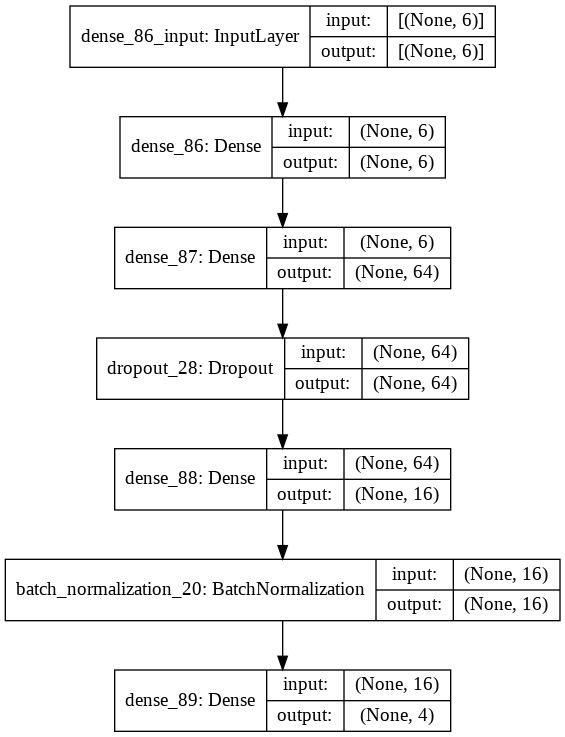

In [420]:
# summarize model 1
plot_model(model, 'model_summary.png', show_shapes=True)

In [421]:
model.evaluate(X_test_ANN, y_test_ANN, verbose=1)

12/12 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9832


[0.10219789296388626, 0.9832402467727661]

In [422]:
model.evaluate(X_train_ANN, y_train_ANN, verbose=1)

45/45 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9958


[0.022327765822410583, 0.9958041906356812]

In [423]:
from matplotlib import pyplot
# plot learning curves

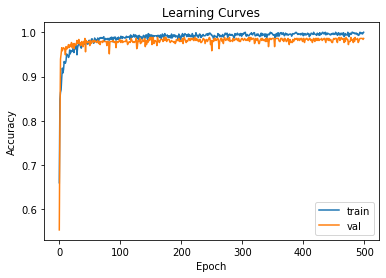

In [424]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

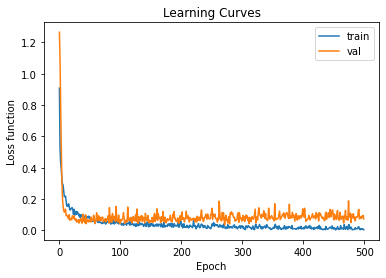

In [425]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## 10. Build Model KNN

In [467]:
#Isi Code
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [500]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_res, test_size=0.2, random_state=17)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1430, 6) (1430,)
Test set: (358, 6) (358,)


In [490]:
#Isi Code
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [501]:
Ks = 50
mean_acc_norm = np.zeros((Ks))

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train) #buat model
    yhat_1 = neigh.predict(X_test) #memprediksi
    mean_acc_norm[n-1] = metrics.accuracy_score(Y_test, yhat_1)

print( "The best accuracy was with", max(mean_acc_norm))

The best accuracy was with 0.9748603351955307


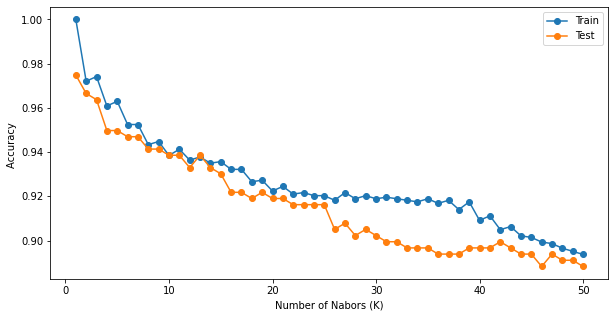

In [502]:
Ks = 50
mean_acc2 =  []
mean_acc3 = []

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train) #buat model
    yhat2 = neigh.predict(X_train) #memprediksi
    acc2 = metrics.accuracy_score(Y_train, yhat2)
    mean_acc2.append(acc2)

    #Train Model and Predict  
    yhat3 = neigh.predict(X_test) #memprediksi
    acc3 = metrics.accuracy_score(Y_test, yhat3)
    mean_acc3.append(acc3)


# plot of train and test scores vs tree depth
fig = plt.figure(figsize =(10, 5))
plt.plot(range(1,Ks+1),mean_acc2, '-o', label='Train')
plt.plot(range(1,Ks+1),mean_acc3, '-o', label='Test')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.legend()
plt.show()

In [486]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_std, Y_res, test_size=0.2, random_state=4)
print ('Train set:', X_train2.shape,  Y_train2.shape)
print ('Test set:', X_test2.shape,  Y_test2.shape)

Train set: (1430, 6) (1430,)
Test set: (358, 6) (358,)


In [487]:
Ks = 50
mean_acc_norm2 = np.zeros((Ks))

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh2 = KNeighborsClassifier(n_neighbors = n).fit(X_train2,Y_train2) #buat model
    yhat_2 = neigh2.predict(X_test2) #memprediksi
    mean_acc_norm2[n-1] = metrics.accuracy_score(Y_test2, yhat_2)

print( "The best accuracy was with", max(mean_acc_norm2))

The best accuracy was with 0.9720670391061452


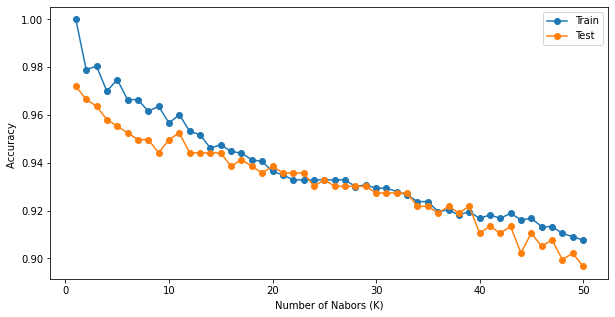

In [488]:
Ks = 50
mean_acc4 =  []
mean_acc5 = []

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train2, Y_train2) #buat model
    yhat4 = neigh.predict(X_train2) #memprediksi
    acc4 = metrics.accuracy_score(Y_train2, yhat4)
    mean_acc4.append(acc4)

    #Train Model and Predict  
    yhat5 = neigh.predict(X_test2) #memprediksi
    acc5 = metrics.accuracy_score(Y_test2, yhat5)
    mean_acc5.append(acc5)


# plot of train and test scores vs tree depth
fig = plt.figure(figsize =(10, 5))
plt.plot(range(1,Ks+1),mean_acc4, '-o', label='Train')
plt.plot(range(1,Ks+1),mean_acc5, '-o', label='Test')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.legend()
plt.show()